In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

START_YEAR = 1992
END_YEAR = 2020
HEM = 'sh'

PATH_SOURCE = "/home/jbassham/jack/data/sh"
PATH_DEST = "/home/jbassham/jack/data/sh/inputs"

In [3]:
# Extract variables

fnam = f"motion_ppv4_latlon_{HEM}_{START_YEAR}_{END_YEAR}.npz"
data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
ui = data['u'] # zonal ice velocity
vi = data['v']
r = data['error'] # ice velocity uncertainty (for u and v)
lat = data['lat']
lon = data['lon']
time = data['time']

print('Velocity, Uncertainty Loaded')

fnam = f"con_nimbus7_latlon_{HEM}_{START_YEAR}_{END_YEAR}.npz"
data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
ic = data['ic'] # ice concentration

print('Concentration Loaded')

print('Variable Files Loaded')

# Mask ice concentration
ic_raw = np.round(ic * 250) # raw value ice concentration (NSIDC)

# NSIDC Masks 
# 251 pole hole
# 252 unused data
# 253 coastline
# 254 land
ic = np.where((ic_raw == 251) | (ic_raw == 252) | (ic_raw == 253) | (ic_raw == 254), np.nan, ic)

print('ic masked')

# Shift present day parameters forward one day, for one point Middle Weddell
uit = ui[1:,:,:]
vit = vi[1:,:,:]

ict = ic[1:,:,:]
tt = time[1:]
rt = r[1:,:,:]

# Remove last day from previous day parameters
icy = ic[:-1,:,:]
ty = time[:-1]

print('days shifted')

Velocity, Uncertainty Loaded
Concentration Loaded
Variable Files Loaded
ic masked
days shifted


/tmp/ipykernel_458420/911787703.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var_true_u = np.nanvar(uit, axis = 0)
/tmp/ipykernel_458420/911787703.py:2: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var_true_v = np.nanvar(vit, axis = 0)
/tmp/ipykernel_458420/911787703.py:4: RuntimeWarning: Degrees of freedom <= 0 for slice.
  w_var_u = np.nanvar(uit / rt, axis = 0)
/tmp/ipykernel_458420/911787703.py:5: RuntimeWarning: Degrees of freedom <= 0 for slice.
  w_var_v = np.nanvar(uit / rt, axis = 0)
/tmp/ipykernel_458420/911787703.py:7: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var_r = np.nanvar(rt, axis = 0)


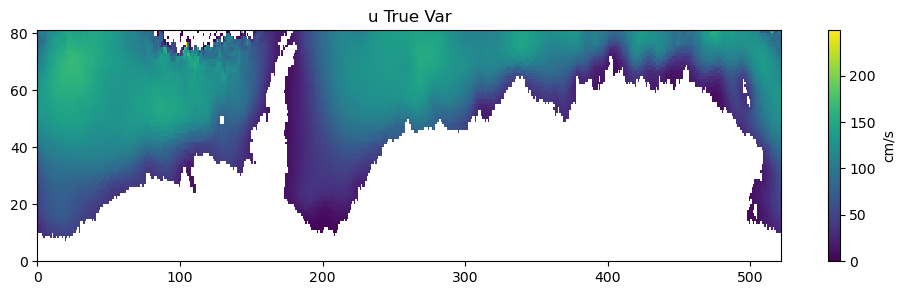

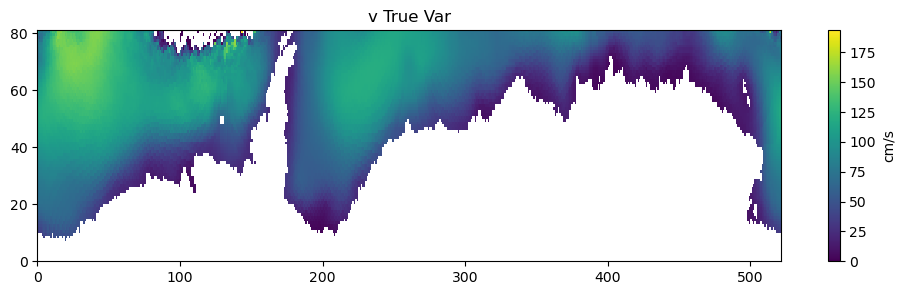

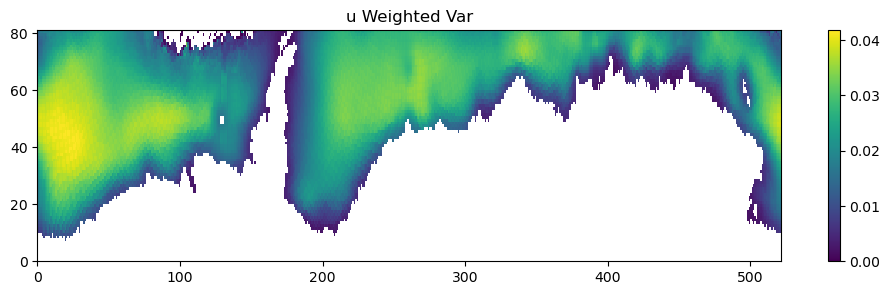

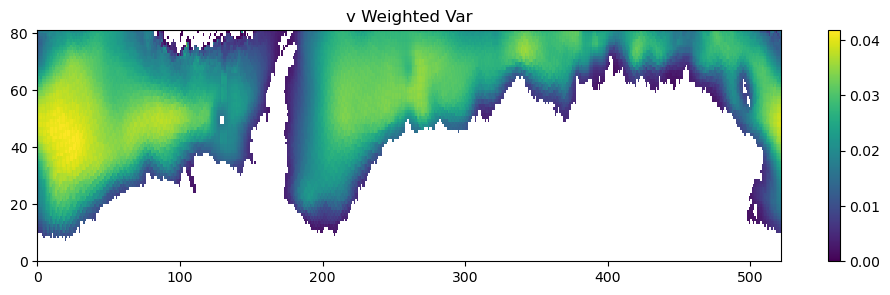

/tmp/ipykernel_458420/911787703.py:34: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(np.log(var_r))


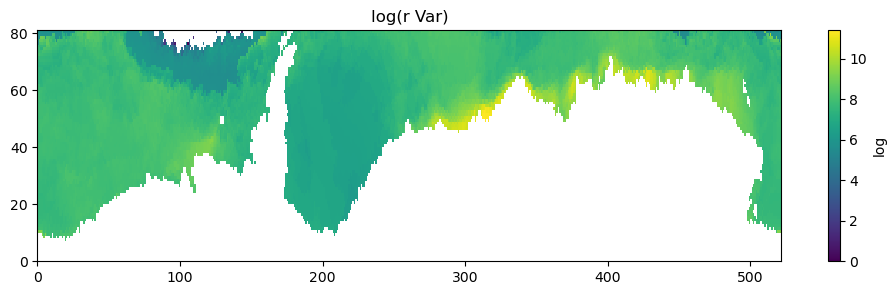

In [26]:
var_true_u = np.nanvar(uit, axis = 0)
var_true_v = np.nanvar(vit, axis = 0)

w_var_u = np.nanvar(uit / rt, axis = 0)
w_var_v = np.nanvar(uit / rt, axis = 0)

var_r = np.nanvar(rt, axis = 0)

plt.figure(figsize = (12, 3))
plt.pcolormesh(var_true_u)
plt.colorbar(label='cm/s')
plt.title('u True Var')
plt.show()

plt.figure(figsize = (12, 3))
plt.pcolormesh(var_true_v)
plt.colorbar(label='cm/s')
plt.title('v True Var')
plt.show()

plt.figure(figsize = (12, 3))
plt.pcolormesh(w_var_u)
plt.colorbar()
plt.title('u Weighted Var')
plt.show()

plt.figure(figsize = (12, 3))
plt.pcolormesh(w_var_v)
plt.colorbar()
plt.title('v Weighted Var')
plt.show()

plt.figure(figsize = (12, 3))
plt.pcolormesh(np.log(var_r))
plt.colorbar(label='log')
plt.title('log(r Var)')
plt.show()

/tmp/ipykernel_458420/2973613298.py:1: RuntimeWarning: Mean of empty slice
  mean_r = np.nanmean(rt, axis = 0)


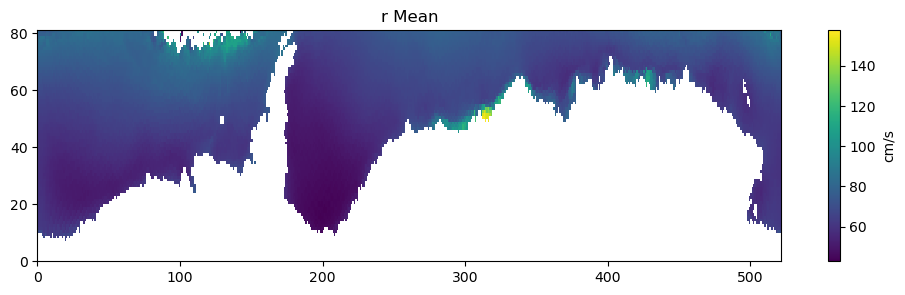

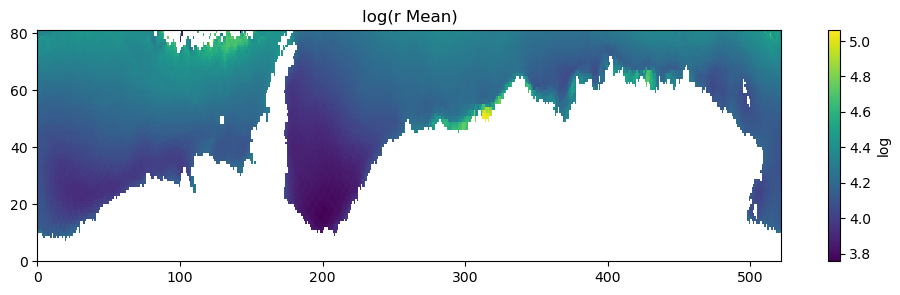

In [8]:
mean_r = np.nanmean(rt, axis = 0)

plt.figure(figsize = (12, 3))
plt.pcolormesh(mean_r)
plt.colorbar(label='cm/s')
plt.title('r Mean')
plt.show()

plt.figure(figsize = (12, 3))
plt.pcolormesh(np.log(mean_r))
plt.colorbar(label='log')
plt.title('log(r Mean)')
plt.show()

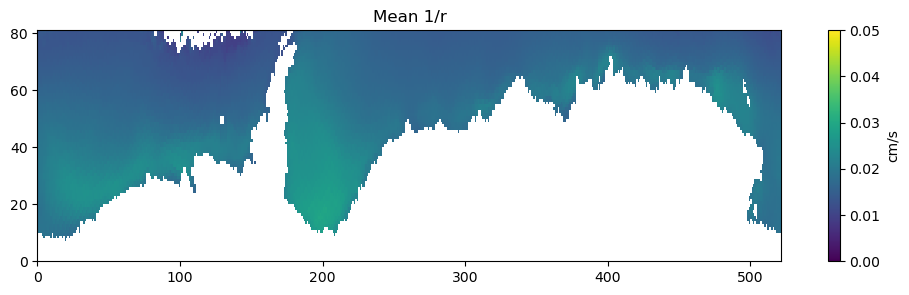

In [20]:
# inv_r = 1 / rt

# mean_inv_r = np.nanmean(inv_r, axis = 0)

vmin = 0
vmax = .05

plt.figure(figsize = (12, 3))
plt.pcolormesh(mean_inv_r, vmin = vmin, vmax = vmax)
plt.colorbar(label='cm/s')
plt.title('Mean 1/r')
plt.show()

/tmp/ipykernel_458420/1465026722.py:3: RuntimeWarning: Mean of empty slice
  mean_rt_demean = np.nanmean(rt_demean, axis = 0)


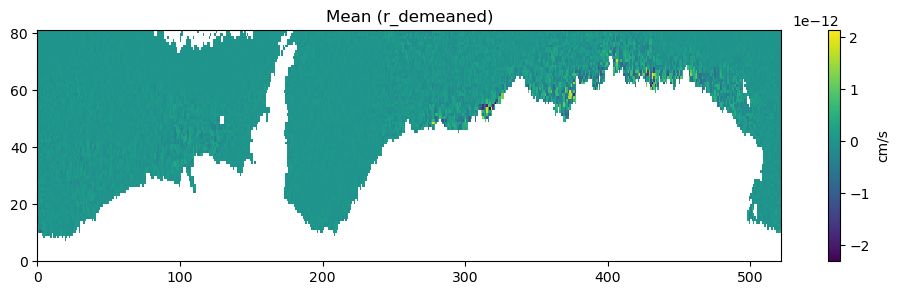

/tmp/ipykernel_458420/1465026722.py:11: RuntimeWarning: divide by zero encountered in divide
  mean_inv_rt_demean = np.nanmean(1 / rt_demean, axis = 0)
/tmp/ipykernel_458420/1465026722.py:11: RuntimeWarning: Mean of empty slice
  mean_inv_rt_demean = np.nanmean(1 / rt_demean, axis = 0)
/tmp/ipykernel_458420/1465026722.py:14: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(np.log(mean_inv_rt_demean))
/tmp/ipykernel_458420/1465026722.py:14: RuntimeWarning: invalid value encountered in log
  plt.pcolormesh(np.log(mean_inv_rt_demean))


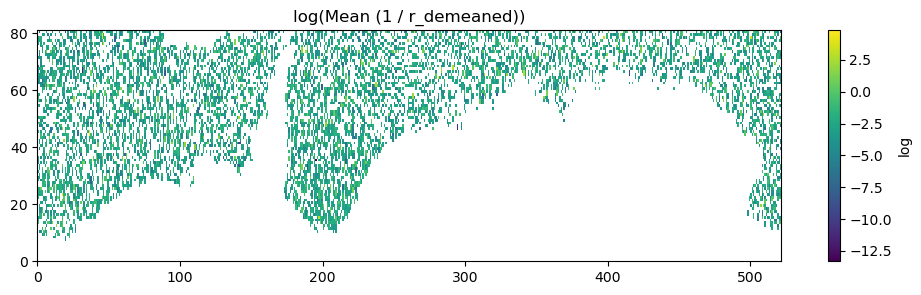

In [25]:
rt_demean = rt - mean_r

mean_rt_demean = np.nanmean(rt_demean, axis = 0)

plt.figure(figsize = (12, 3))
plt.pcolormesh(mean_rt_demean)
plt.colorbar(label='cm/s')
plt.title('Mean (r_demeaned)')
plt.show()

mean_inv_rt_demean = np.nanmean(1 / rt_demean, axis = 0)

plt.figure(figsize = (12, 3))
plt.pcolormesh(np.log(mean_inv_rt_demean))
plt.colorbar(label='log')
plt.title('log(Mean (1 / r_demeaned))')
plt.show()


In [ ]:
u_w_var = 
v_w_var = 

In [ ]:
# PATH_SOURCE = "/home/jbassham/jack/data/sh/inputs/cnn_inputs"

# # Load CNN data split indices and land mask
# fnam = f'indices_land_{HEM}_{START_YEAR}_{END_YEAR}.npz'
# data = np.load(os.path.join(PATH_SOURCE, fnam))
# train_idx = data['train_idx']
# val_idx = data['val_idx']
# test_idx = data['test_idx']
# land_mask = data['land_mask']

# print("Indices and Land Mask Loaded")

In [ ]:
# PATH_SOURCE = "/home/jbassham/jack/data/sh/outputs"

# # Load CNN predictions
# fnam = "CNNPreds_sh_1992_2020_torchV1.npz"
# data = data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
# yPredCNN = data['y_pred']
# yTrueCNN = data['y_true']

# # Get u and v components from CNN predictions

# uPredC = yPredCNN[:,0,:,:]
# uTrueC = yTrueCNN[:,0,:,:]

# vPredC = yPredCNN[:,1,:,:]
# vTrueC = yTrueCNN[:,1,:,:]

# # Mask CNN Land Points
# uPredC = np.where(land_mask, np.nan, uPredC)
# uTrueC = np.where(land_mask, np.nan, uTrueC)
# vPredC = np.where(land_mask, np.nan, vPredC)
# vTrueC = np.where(land_mask, np.nan, vTrueC)

In [ ]:
# # Crop uncertainty to test indices

# r_test = rt[test_idx,:,:]
# uit_test = uit[test_idx,:,:]
# vit_test = vit[test_idx,:,:]

In [ ]:
# Create list of input variables
invars = [uit, vit, rt, icy]
nvars = len(invars)
var_names = ['uit', 'vit', 'rt', 'icy']

# Calcluate pre-mask means and stds
globMeans = [np.nanmean(var) for var in invars]
gridMeans = [np.nanmean(var, axis = 0) for var in invars]

globStds = [np.nanstd(var) for var in invars]
gridStds = [np.nanstd(var, axis = 0) for var in invars]

for globMean, var_name in zip(globMeans, var_names):
    print(f"Mean {var_name}: {globMean:.3f}")    

print()

for globStd, var_name in zip(globStds, var_names):
    print(f"Std {var_name}: {globStd:.3f}")

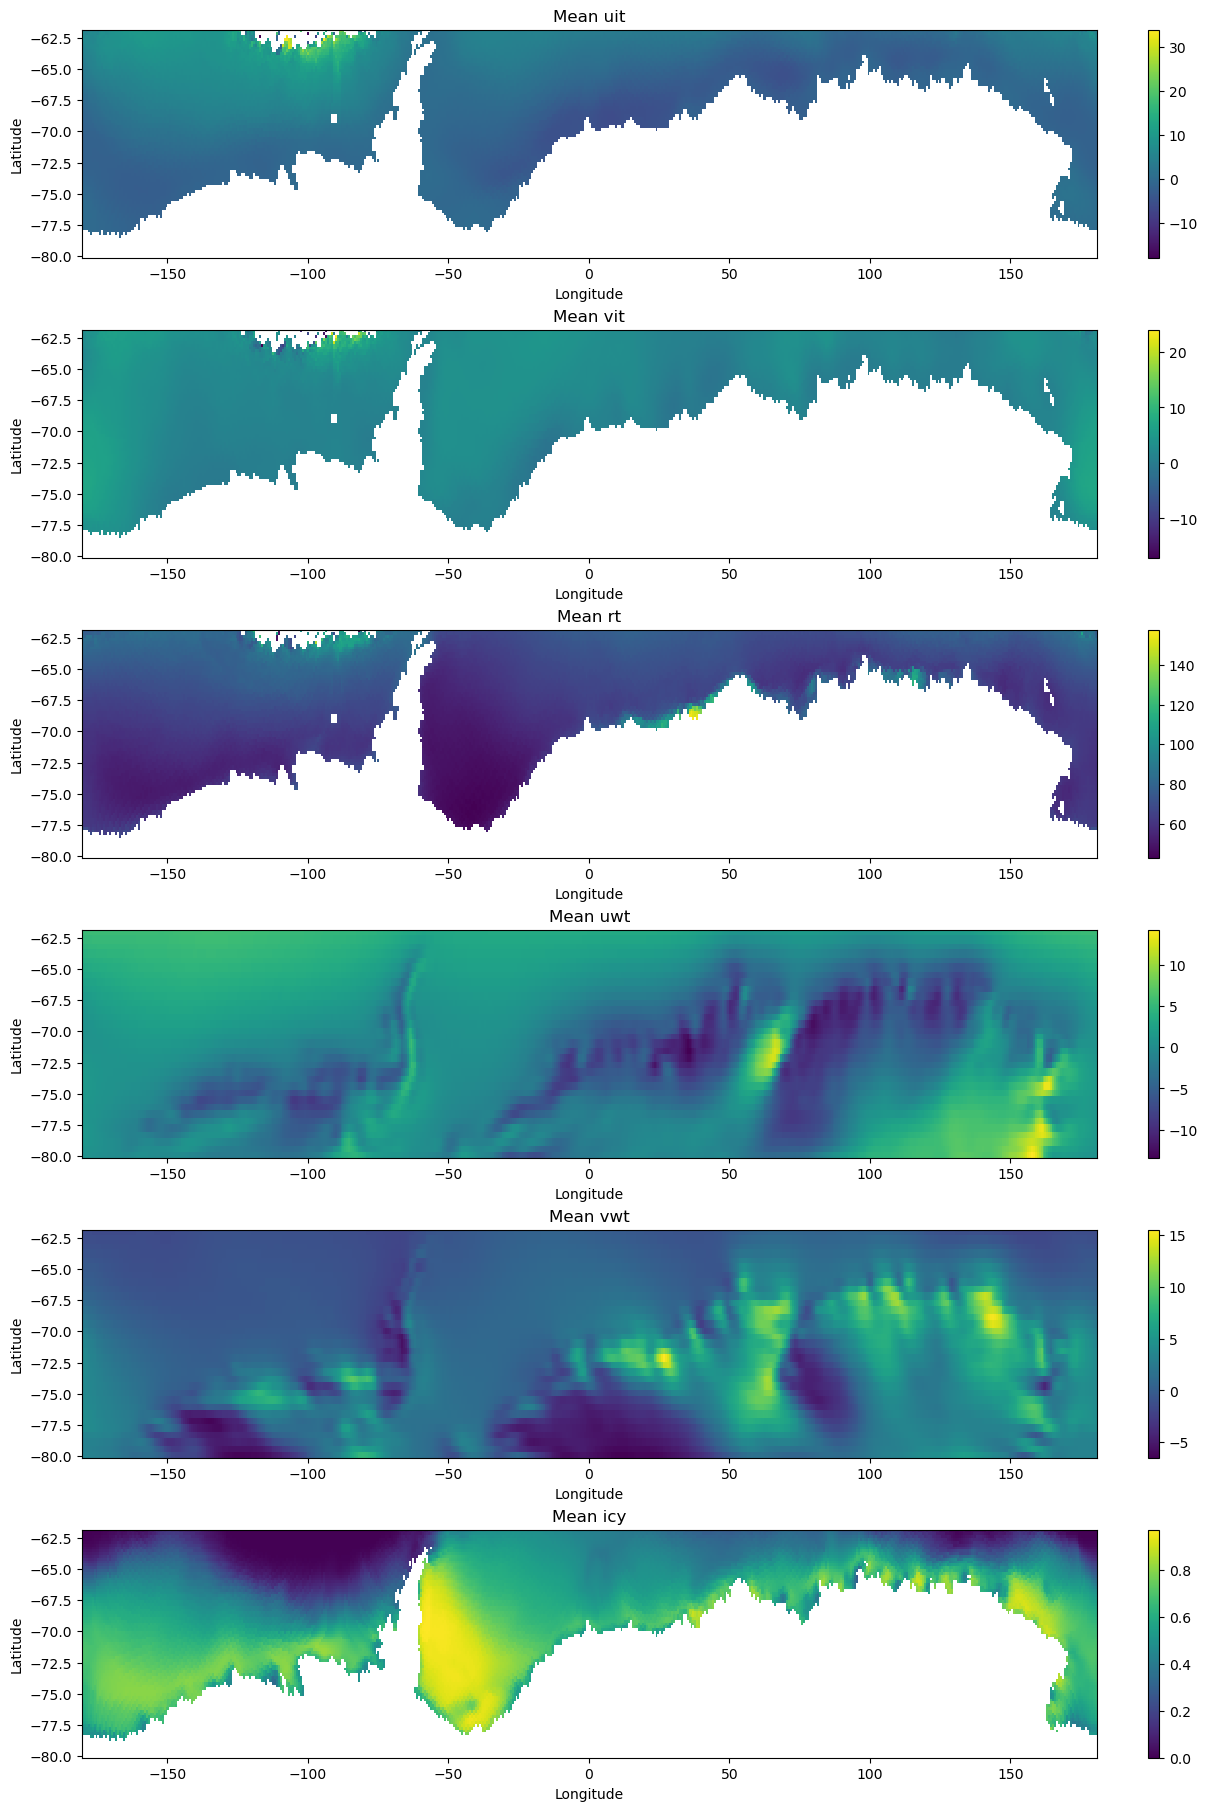

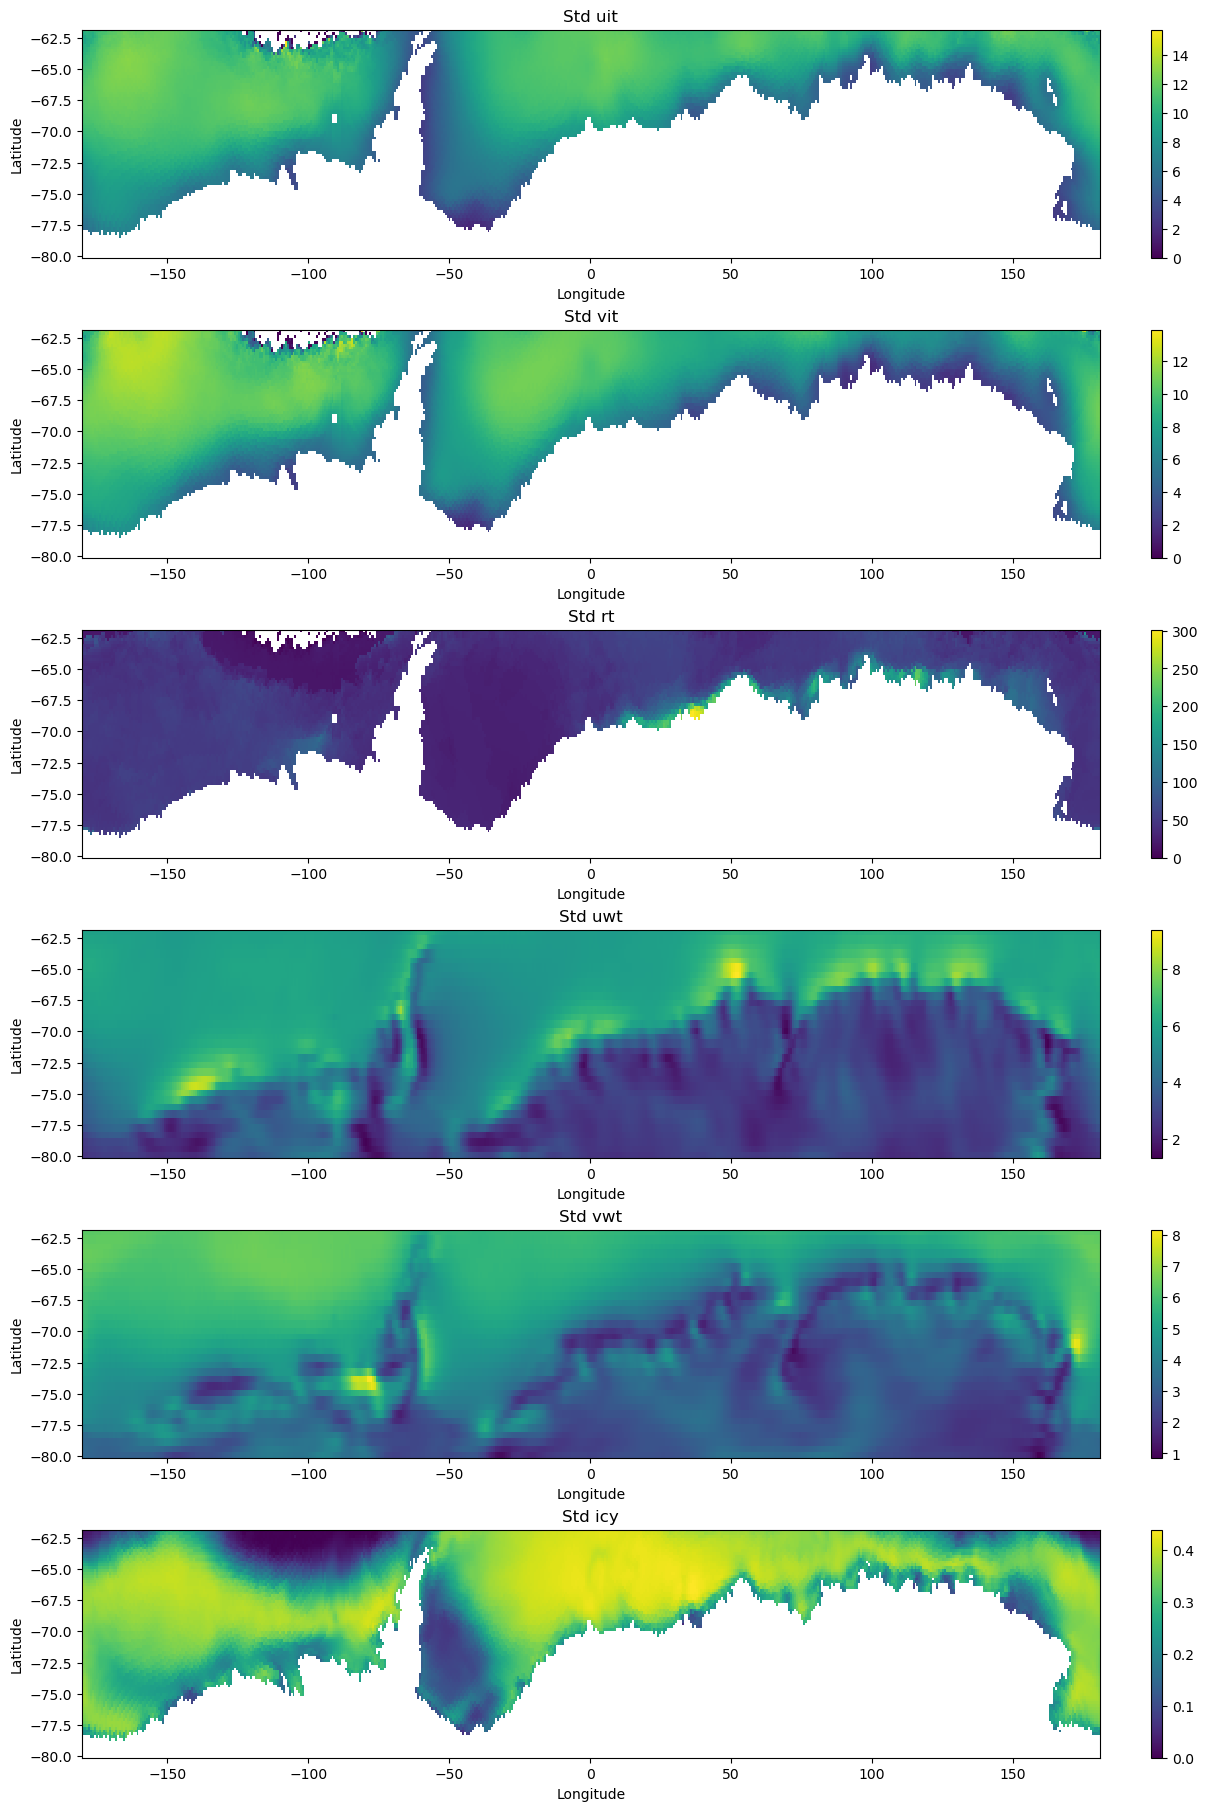

In [ ]:
# fig, axs = plt.subplots(nrows=nvars, ncols=1, figsize=(12, nvars*3), constrained_layout=True)

# for i in range(nvars):
#     pcm = axs[i].pcolormesh(lon, lat, gridMeans[i])
#     fig.colorbar(pcm, ax=axs[i])
#     axs[i].set(title=f"Mean {var_names[i]}", xlabel="Longitude", ylabel="Latitude")

# plt.show()

# fig, axs = plt.subplots(nrows=nvars, ncols=1, figsize=(12, nvars*3), constrained_layout=True)

# for i in range(nvars):
#     pcm = axs[i].pcolormesh(lon, lat, gridStds[i])
#     fig.colorbar(pcm, ax=axs[i])
#     axs[i].set(title=f"Std {var_names[i]}", xlabel="Longitude", ylabel="Latitude")

# plt.show()

In [ ]:
# Mask spatial indices with concentration less than .15, NaN concentration
# NOTE keeping flag values for ice velocity uncertainties
mask2 = (ict <= .15) | (np.isnan(ict))

# NaN out points meeting mask condition
invarsMask2 = [np.where(mask2, np.nan, var) for var in invars]

# Calcluate first-masked means and stds
globMeans2 = [np.nanmean(var) for var in invarsMask2]
gridMeans2 = [np.nanmean(var, axis = 0) for var in invarsMask2]

globStds2 = [np.nanstd(var) for var in invarsMask2]
gridStds2 = [np.nanstd(var, axis = 0) for var in invarsMask2]

for globMean, var_name in zip(globMeans2, var_names):
    print(f"Mean {var_name}: {globMean:.3f}")    

print()

for globStd, var_name in zip(globStds2, var_names):
    print(f"Std {var_name}: {globStd:.3f}")

/tmp/ipykernel_343749/4038096303.py:10: RuntimeWarning: Mean of empty slice
  gridMeans2 = [np.nanmean(var, axis = 0) for var in invarsMask2]


Mean uit: -0.005
Mean vit: 2.198
Mean rt: 62.547
Mean uwt: -0.025
Mean vwt: 1.035
Mean icy: 0.785

Std uit: 9.508
Std vit: 8.375
Std rt: 59.266
Std uwt: 6.360
Std vwt: 5.161
Std icy: 0.197


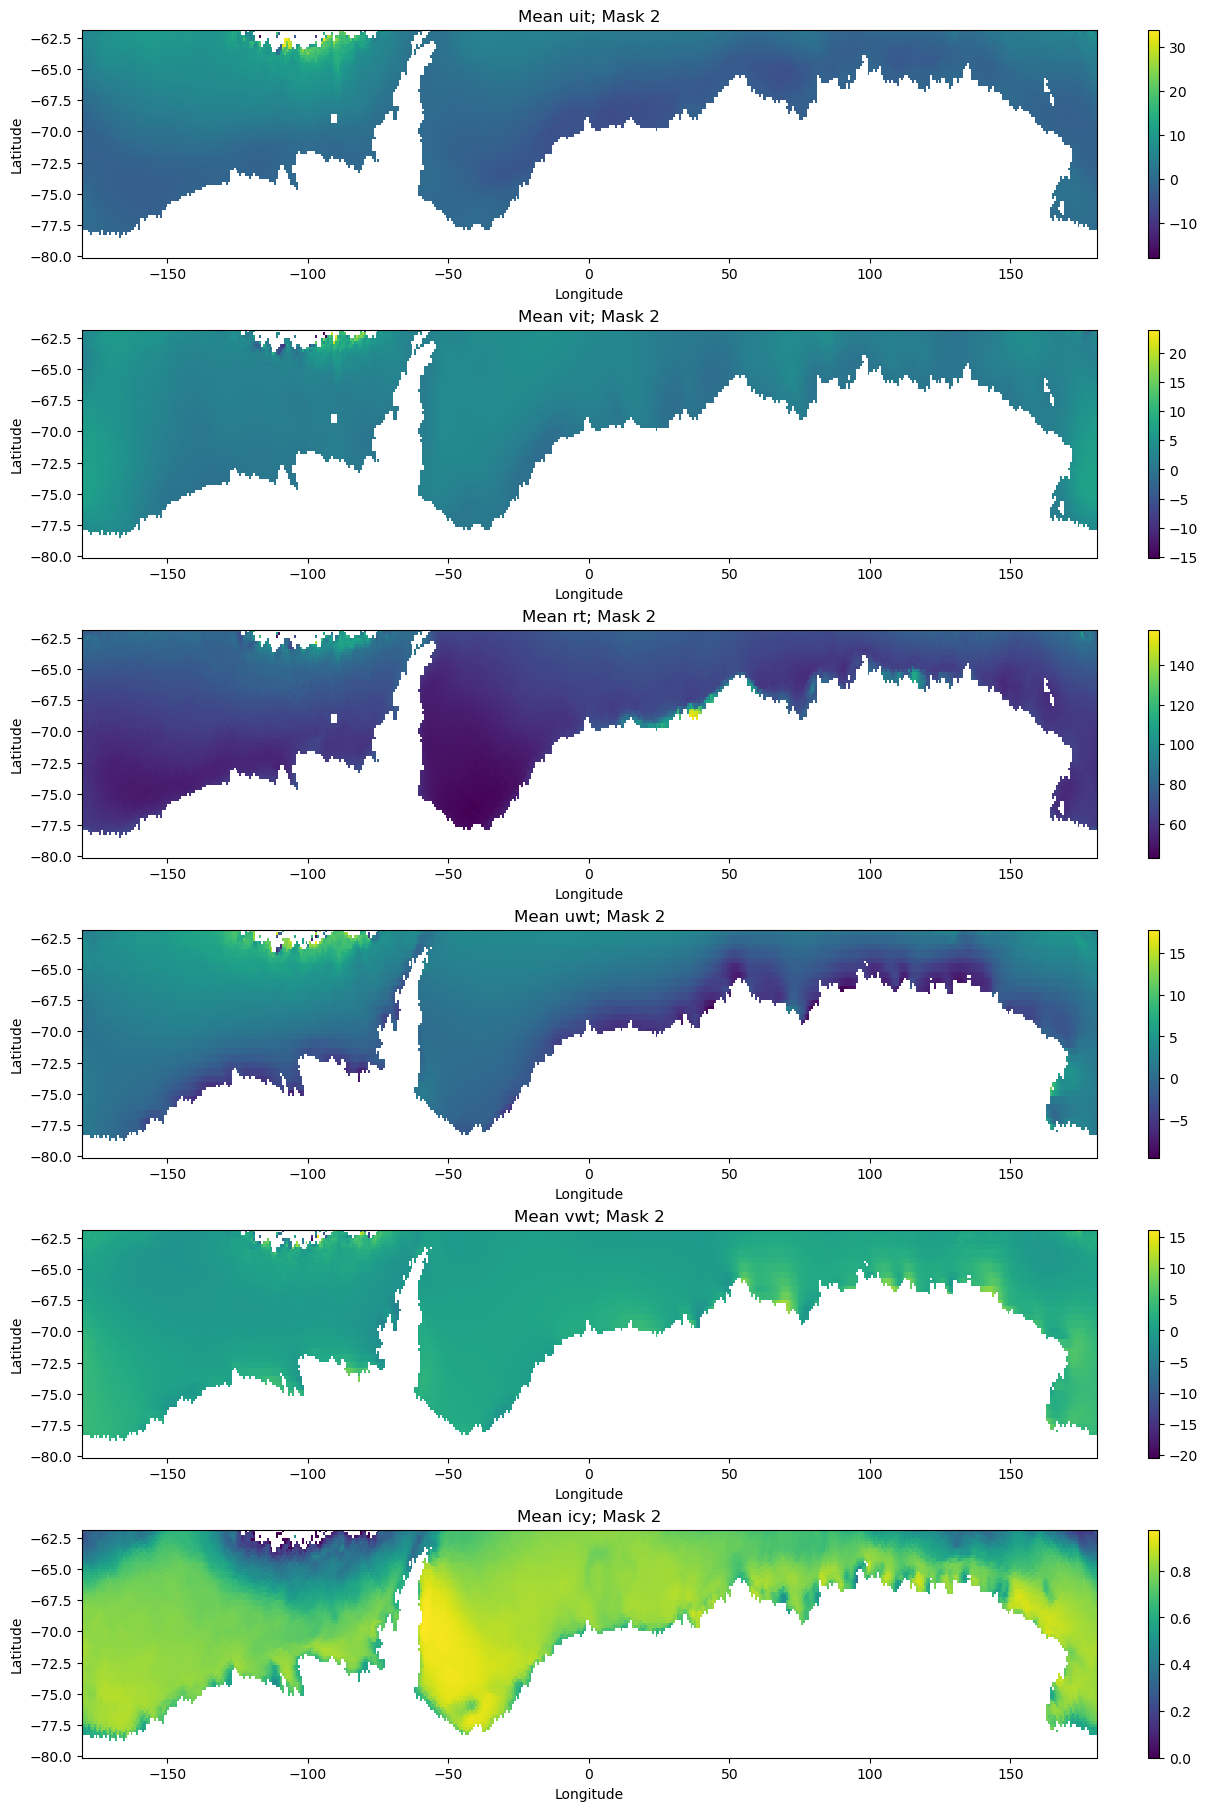

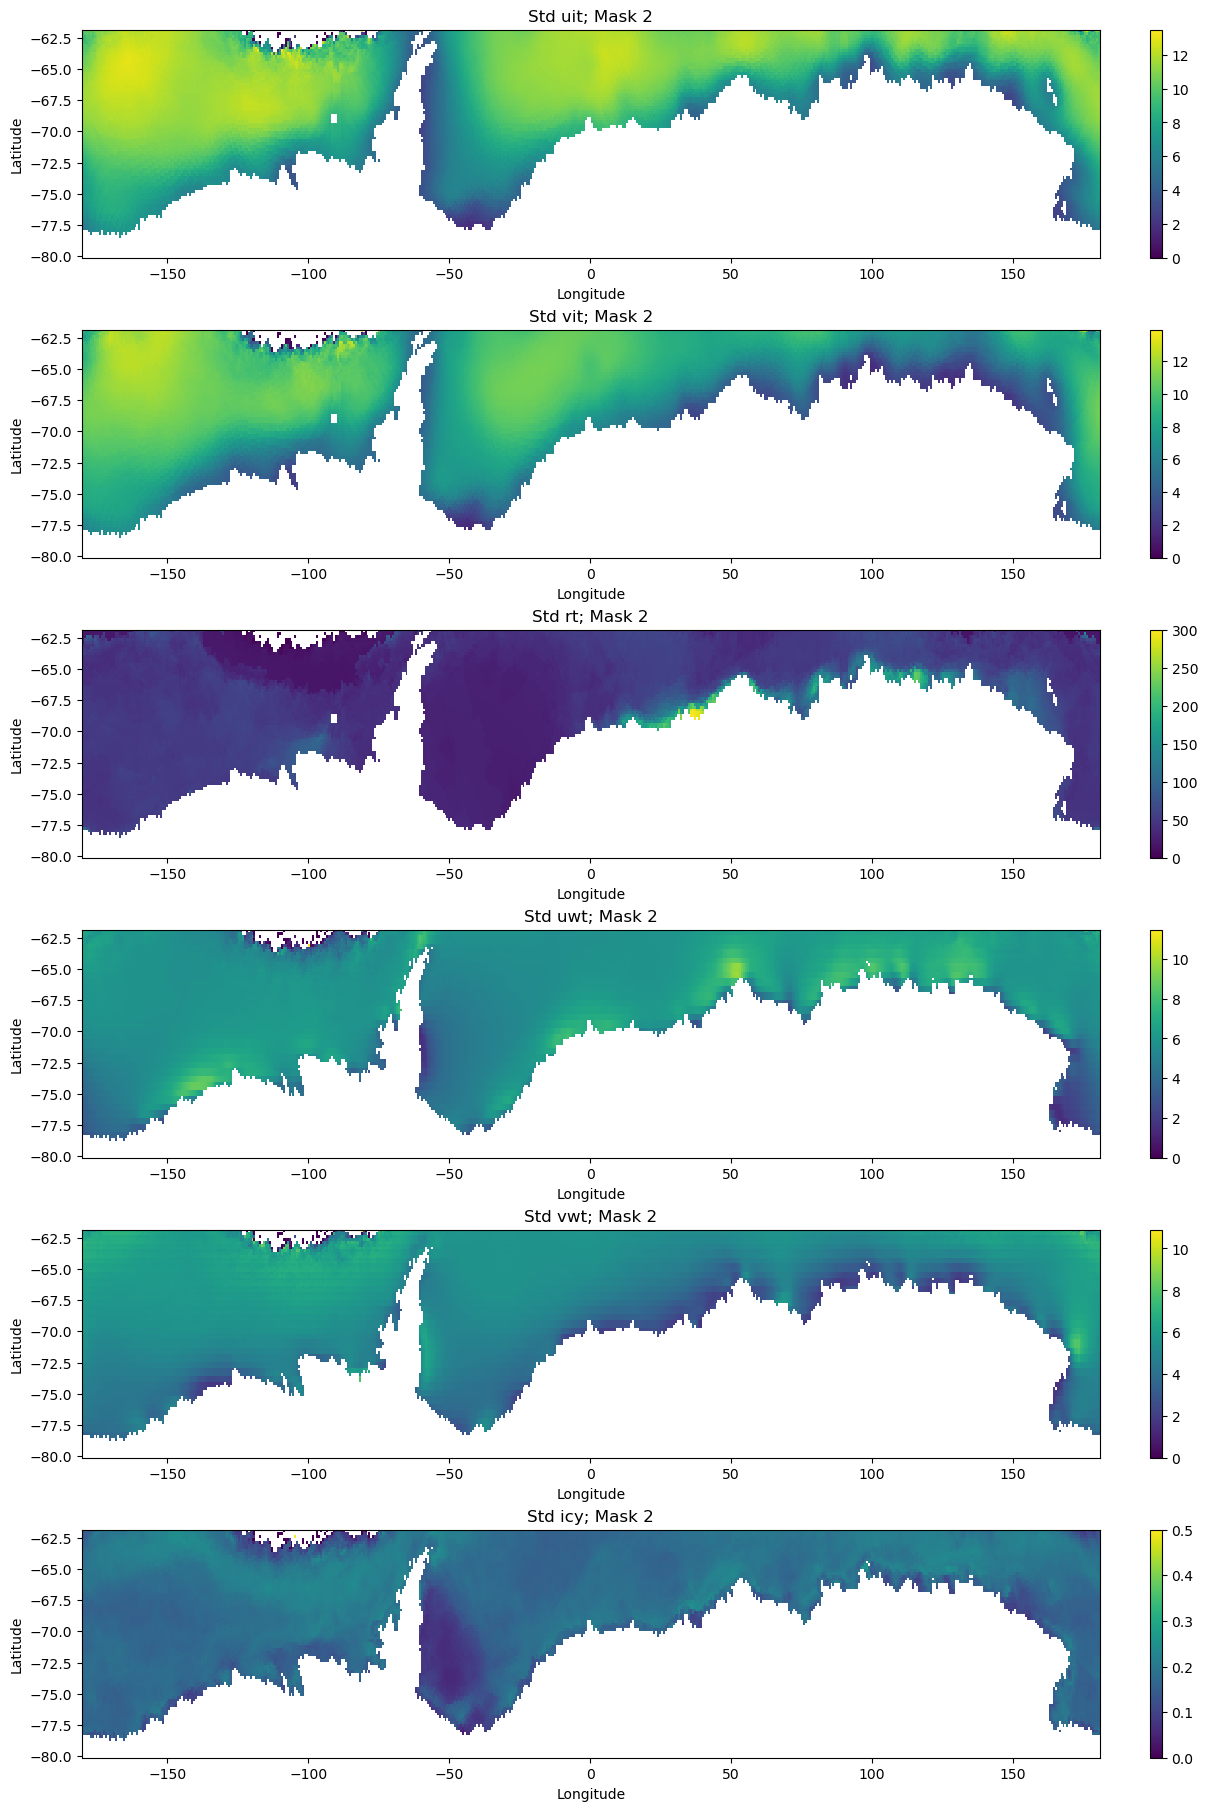

In [ ]:
# fig, axs = plt.subplots(nrows=nvars, ncols=1, figsize=(12, nvars*3), constrained_layout=True)

# for i in range(nvars):
#     pcm = axs[i].pcolormesh(lon, lat, gridMeans2[i])
#     fig.colorbar(pcm, ax=axs[i])
#     axs[i].set(title=f"Mean {var_names[i]}; Mask 2", xlabel="Longitude", ylabel="Latitude")

# plt.show()

# fig, axs = plt.subplots(nrows=nvars, ncols=1, figsize=(12, nvars*3), constrained_layout=True)

# for i in range(nvars):
#     pcm = axs[i].pcolormesh(lon, lat, gridStds2[i])
#     fig.colorbar(pcm, ax=axs[i])
#     axs[i].set(title=f"Std {var_names[i]}; Mask 2", xlabel="Longitude", ylabel="Latitude")

# plt.show()

In [ ]:
# Mask spatial indices with concentration less than .15, NaN concentration
# NOTE keeping flag values for ice velocity uncertainties
mask3 = (np.nanmean(ict, axis = 0) <= .15) | (np.isnan(ict))

# NaN out points meeting mask condition
invarsMask3 = [np.where(mask2, np.nan, var) for var in invars]

# Calcluate first-masked means and stds
globMeans3 = [np.nanmean(var) for var in invarsMask3]
gridMeans3 = [np.nanmean(var, axis = 0) for var in invarsMask3]

globStds3 = [np.nanstd(var) for var in invarsMask3]
gridStds3 = [np.nanstd(var, axis = 0) for var in invarsMask3]

for globMean, var_name in zip(globMeans3, var_names):
    print(f"Mean {var_name}: {globMean:.3f}")    

print()

for globStd, var_name in zip(globStds3, var_names):
    print(f"Std {var_name}: {globStd:.3f}")

/tmp/ipykernel_343749/3809501411.py:3: RuntimeWarning: Mean of empty slice
  mask3 = (np.nanmean(ict, axis = 0) <= .15) | (np.isnan(ict))
/tmp/ipykernel_343749/3809501411.py:10: RuntimeWarning: Mean of empty slice
  gridMeans3 = [np.nanmean(var, axis = 0) for var in invarsMask3]


Mean uit: -0.005
Mean vit: 2.198
Mean rt: 62.547
Mean uwt: -0.025
Mean vwt: 1.035
Mean icy: 0.785

Std uit: 9.508
Std vit: 8.375
Std rt: 59.266
Std uwt: 6.360
Std vwt: 5.161
Std icy: 0.197


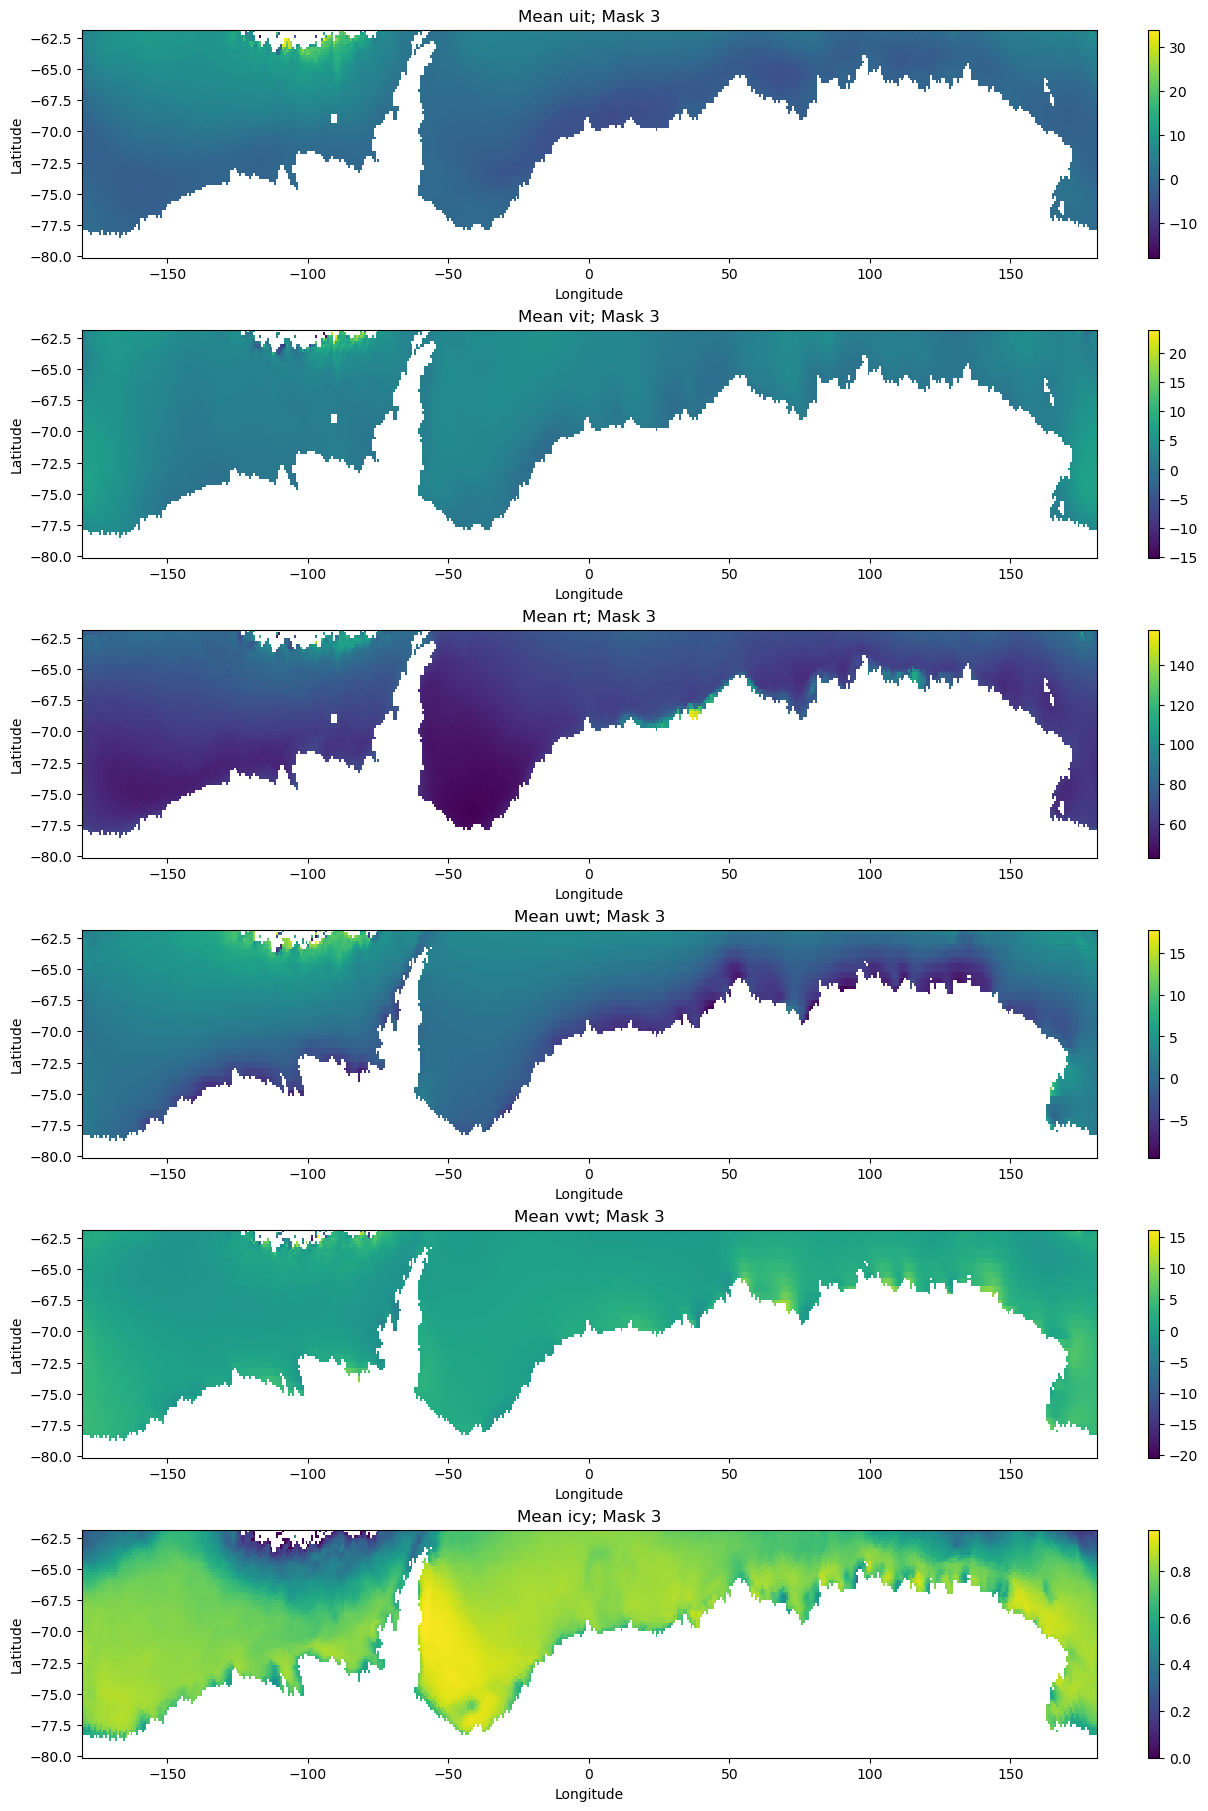

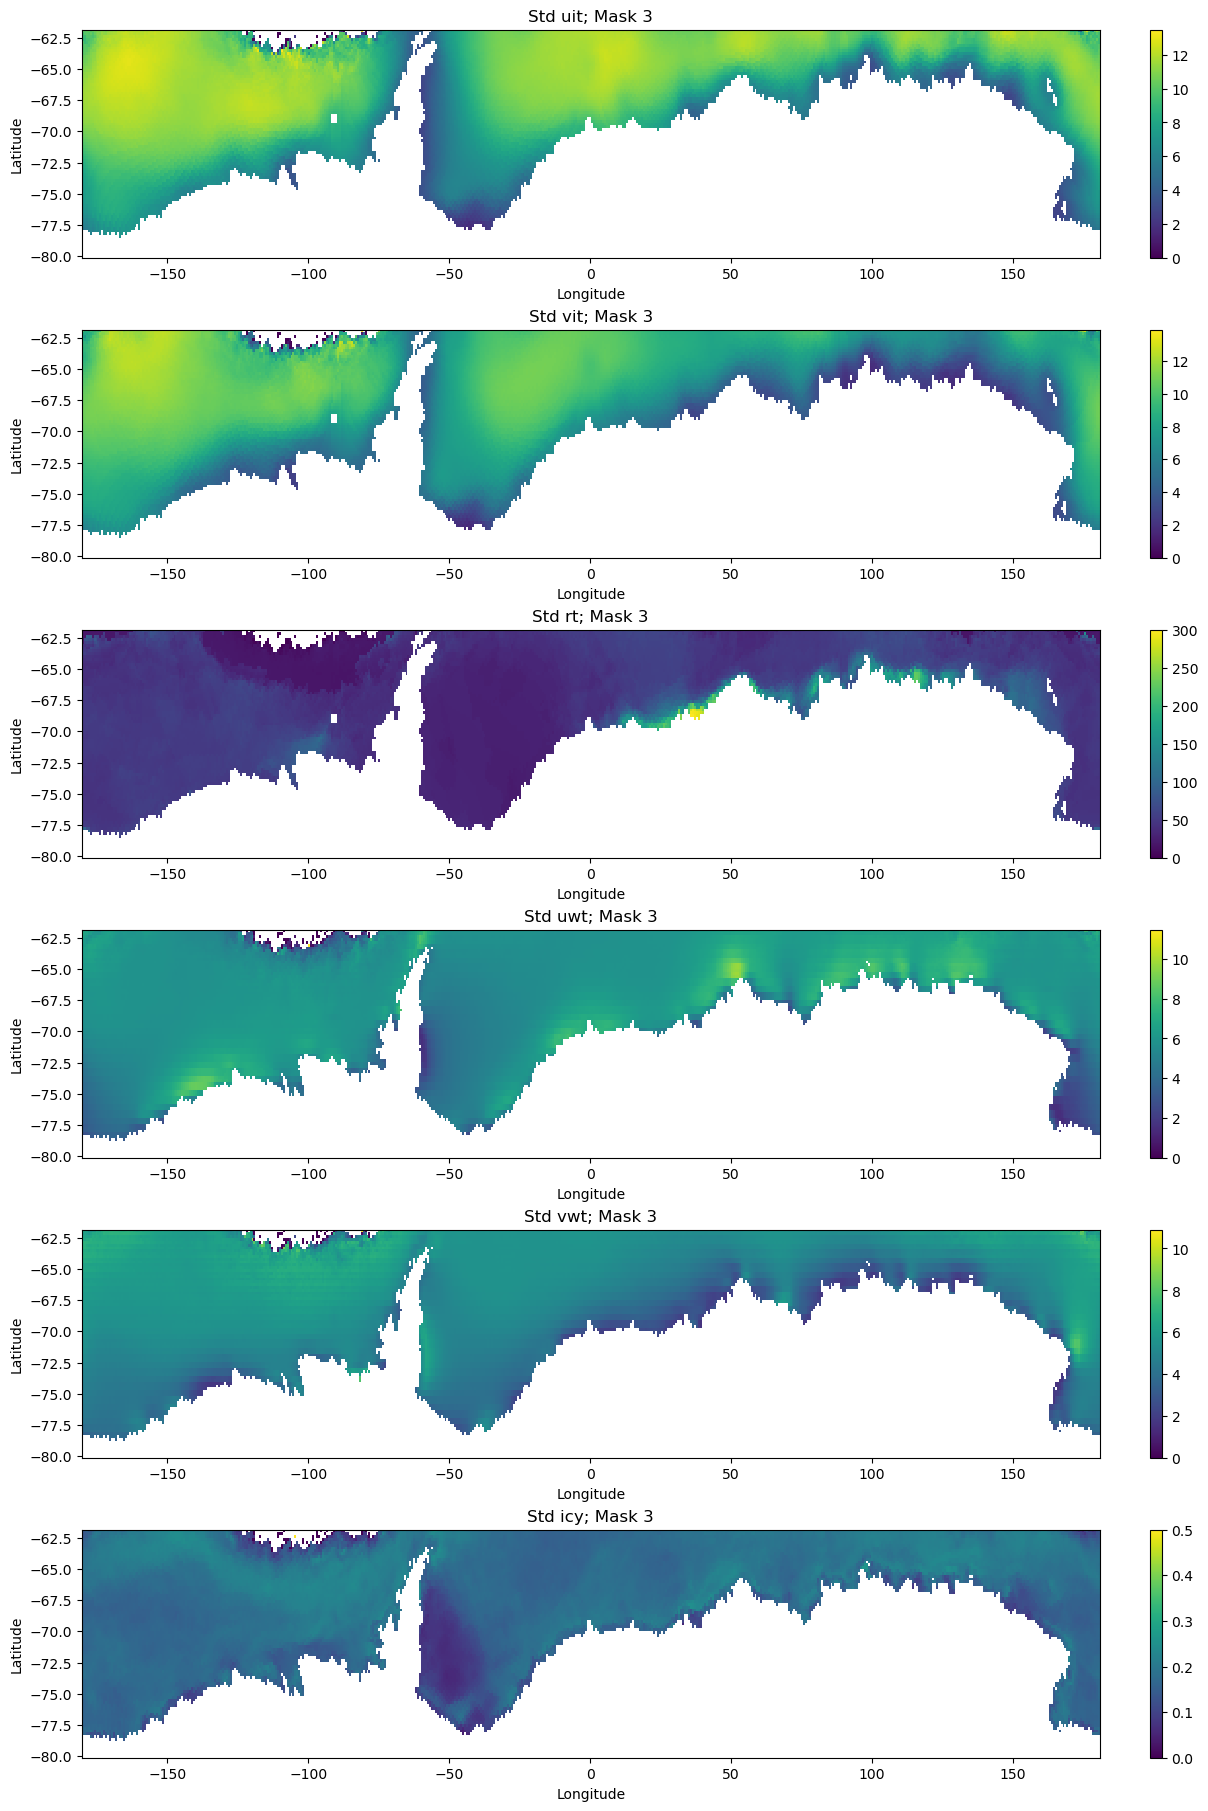

In [ ]:
# fig, axs = plt.subplots(nrows=nvars, ncols=1, figsize=(12, nvars*3), constrained_layout=True)

# for i in range(nvars):
#     pcm = axs[i].pcolormesh(lon, lat, gridMeans3[i])
#     fig.colorbar(pcm, ax=axs[i])
#     axs[i].set(title=f"Mean {var_names[i]}; Mask 3", xlabel="Longitude", ylabel="Latitude")

# plt.show()

# fig, axs = plt.subplots(nrows=nvars, ncols=1, figsize=(12, nvars*3), constrained_layout=True)

# for i in range(nvars):
#     pcm = axs[i].pcolormesh(lon, lat, gridStds3[i])
#     fig.colorbar(pcm, ax=axs[i])
#     axs[i].set(title=f"Std {var_names[i]}; Mask 3", xlabel="Longitude", ylabel="Latitude")

# plt.show()

In [ ]:
# Continue with Mask 2 (keeping flag values in uncertainty)

# Remove temporal mean from inputs at every gridpoint
invars_demean2 = [var - mean for var, mean in zip(invarsMask2, gridMeans2)]

# Compute global standard deviation (entire time series) of demeaned inputs
stds2 = [np.nanstd(var) for var in invars_demean2]

print("Stds after removing mean;")
for std, var_name in zip(stds2, var_names):
    print(f"   Std {var_name}: {std:.3f}")

Stds after removing mean;
   Std uit: 9.033
   Std vit: 8.201
   Std rt: 58.416
   Std uwt: 5.789
   Std vwt: 4.884
   Std icy: 0.172


In [ ]:
# Unpack statistics
uit_m, vit_m, rt_m, uwt_m, vwt_m, icy_m = gridMeans2
uit_std, vit_std, rt_std, uwt_std, vwt_std, icy_std = stds2

# Unpack input variables
uit, vit, rt, uwt, vwt, icy = invars_demean2

# Normalize variables by global standard deviation (z-score normalization)
# NOTE Uncertainty normalized by average of u and v ice velocity std

uitn2 = uit / uit_std
vitn2 = uit / vit_std

rt_std_star2 = (uit_std + vit_std) / 2
print(f"rt std star; {rt_std_star2:.3f}")
rtn2 = rt / rt_std_star2

icyn2 = icy / icy_std

rt std star; 8.617
